<h1> Predicting house prices with sklearn </h1>
<br>
<h2> Implementing multiple linear regression using sklearn's "LinearRegression" to predict house prices</h2>
<br>

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics

In [2]:
#importing the training data file and splitting into input features and output
training_data = pd.read_csv('all/train.csv')
x_train = training_data.iloc[:, 0:14]
y_train = training_data.iloc[:, 14]

In [3]:
#dropping the id column as it is irrelevant to the output
x_train.drop('ID', axis = 1, inplace = True)

In [4]:
#feature scaling the values of x_train
from sklearn.preprocessing import StandardScaler
sc_x_train = StandardScaler()
x_train = sc_x_train.fit_transform(x_train)

/home/aathi/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/aathi/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
#creating the linear regression object and fitting to our training data
lin_reg = linear_model.LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
#printing the learned paramter vector
print("Learned Parameters : ")
print("{}".format(lin_reg.coef_))

Learned Parameters : 
[-0.38533599  1.07418454  0.37631929  0.89927653 -1.80662577  2.64908845
 -0.12996621 -3.06379849  2.87156628 -2.19483476 -1.84128775  1.00856953
 -4.23652255]


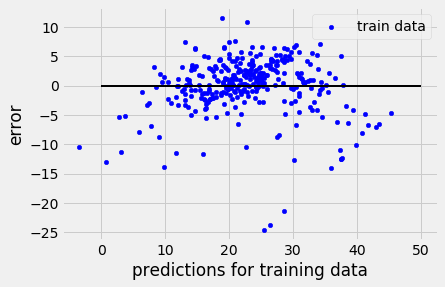

In [7]:
#plotting the residual errors plot for the training data
%matplotlib inline
plt.style.use("fivethirtyeight")
plt.scatter(lin_reg.predict(x_train), lin_reg.predict(x_train) - y_train, color = 'b', s = 20, label = "train data")
plt.legend(loc = 'upper right')
plt.xlabel('predictions for training data')
plt.ylabel('error')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.show()

In [8]:
#importing the test data
x_test = pd.read_csv('all/test.csv')
ind = x_test.loc[:, 'ID']
x_test.drop('ID', axis = 1, inplace = True)
#scaling features of x_test
sc_x_test = sc_x_train.transform(x_test)
y_pred = lin_reg.predict(sc_x_test)
pd.DataFrame(y_pred).head()

/home/aathi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


,0
0,30.599594
1,25.100459
2,18.158993
3,9.303476
4,17.689729


In [9]:
pred = pd.Series(y_pred)
sub_df = pd.concat([ind, pred], axis = 1)
sub_df.rename({0:'medv'}, axis = 1, inplace = True)
sub_df.to_csv('submission_sklearn.csv')
sub_df.head()

,ID,medv
0,3,30.599594
1,6,25.100459
2,8,18.158993
3,9,9.303476
4,10,17.689729
